<a href="https://colab.research.google.com/github/simodepth/Entities/blob/main/NLP_%26_NLU_to_Identify_Entities_and_Sentiment_from_a_PLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#How do search engine understand a search query?

**NLP** (Natural Language Process) and **NLU** (Natural Language Understanding) are supervised machine learning models meaning they are being constantly trained using labelled data.

They are the reason behind the search engine accuracy in returning correct and reliable search results from flawed queries (e.g  “**McConnahey**” → **McConnaughey**)

#What is NLP?
**NLP** focuses on understanding natural language in terms of patterns detected from a large proportion of unstructured data (AKA *entities*). To do that, NLP breaks and processes language  using a particular strategy called “**Tokenization**”, which aims to normalize a text by either breaking down patterns to their stem (e.g “carry”/”carries” → “carri”) or to an always recognizable pattern (e.g “carry”/”carries” → “carry”). Such granular techniques are called **Stemming** and **Lemmatization**.
In 

#What is NLU?

**NLU** focuses on understanding the meaning of a whole sentence to provide language comprehension. NLU enables computer programmes to deduce purpose from language, even if the written or spoken language is flawed. In fact the model is designed to complete sentiment analysis tasks and determine the emotional tone of a text.





#NLP and NLU in this Python framework

This Python framework is designed to extract entities and return a sentiment analysis from a PLP text

In the first part of the following script, NLP will be leveraged to tokenize a text from a chosen PLP and extract entities.

In the second part, NLU will be used to carry out a handy sentiment analysis of the submitted PLP text

#Requirements and Assumptions
- Run on Google Colab
- Python 3 is installed 
- Google Cloud Platform account
- [NLP API Enabled](https://cloud.google.com/natural-language/docs)
- Credentials created (service account) and JSON file downloaded
- NLP JSON key API needs to be uploaded **every time you run this script**





In [5]:
#@title Import Modules
import os
from google.cloud import language_v1
from google.cloud.language_v1 import enums

from google.cloud import language
from google.cloud.language import types

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag

In [2]:
#@title Load up the JSON-LD key API 
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "/content/nlp-api-348917-9095c7f4e634.json"


In [3]:
#@title Text Tokenization
text = "In a Fastest Thinker First Frenzy, players take turns to deal their playing cards: a combination of Letter Cards and Action Cards, down on three piles of Letter Cards. As your playing cards are laid down in turn, one by one, on the equal three piles, an Action Card will appear, leaving the two Letter Cards visible. "
print(text)


In a Fastest Thinker First Frenzy, players take turns to deal their playing cards: a combination of Letter Cards and Action Cards, down on three piles of Letter Cards. As your playing cards are laid down in turn, one by one, on the equal three piles, an Action Card will appear, leaving the two Letter Cards visible. 


In [8]:
#@title Stemming Words
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
#create an object of class PorterStemmer
#A list of words to be stemmed
word_list = ['In',
 'a',
 'Fastest',
 'Thinker',
 'First',
 'Frenzy',
 'players',
 'take',
 'turns',
 'to',
 'deal',
 'their',
 'playing',
 'cards,',
 'a',
 'combination',
 'of',
 'Letter',
 'Cards',
 'and',
 'Action',
 'Cards,',
 'down',
 'on',
 'three',
 'piles',
 'of',
 'Letter',
 'Cards',
 'As',
 'your',
 'playing',
 'cards',
 'are',
 'laid',
 'down',
 'in',
 'turn',
 'one',
 'by',
 'one',
 'one',
 'the',
 'equal',
 'three',
 'piles',
 'an',
 'action',
 'card',
 'will',
 'appear',
 'leaving',
 'the',
 'two',
 'Letter',
 'Cards',
 'visible',
 ]
print("{0:20}{1:20}".format("Word","Snowball Stemmer"))
for word in word_list:
    print("{0:20}{1:20}".format(word,stemmer.stem(word)))


Word                Snowball Stemmer    
In                  in                  
a                   a                   
Fastest             fastest             
Thinker             thinker             
First               first               
Frenzy              frenzi              
players             player              
take                take                
turns               turn                
to                  to                  
deal                deal                
their               their               
playing             play                
cards,              cards,              
a                   a                   
combination         combin              
of                  of                  
Letter              letter              
Cards               card                
and                 and                 
Action              action              
Cards,              cards,              
down                down                
on              

📔The Porter Stemmer is available in the python NLTK module and it is language independent. But the **Snowball Stemmer** works **language specific and might give better results**.

In [9]:
#@title Extract Recognizable Words with Lemmatization
# Install spaCy (run in terminal/prompt)
import sys
!{sys.executable} -m pip install spacy

# Download spaCy's  'en' Model
!{sys.executable} -m spacy download en

import spacy

# Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
nlp = spacy.load("en_core_web_sm")


sentence = "In a Fastest Thinker First Frenzy, players take turns to deal their playing cards: a combination of Letter Cards and Action Cards, down on three piles of Letter Cards. As your playing cards are laid down in turn, one by one, on the equal three piles, an Action Card will appear, leaving the two Letter Cards visible."
# Parse the sentence using the loaded 'en' model object `nlp`
doc = nlp(sentence)

# Extract the lemma for each token and join
" ".join([token.lemma_ for token in doc])




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 33.8 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


'in a Fastest Thinker First Frenzy , player take turn to deal their playing card : \xa0 a combination of Letter Cards and Action Cards , down on three pile of Letter Cards . as your playing card be lay down in turn , one by one , on the equal three pile , an Action Card will appear , leave the two Letter Cards visible .'

📔 **spaCy** is relatively new in the space and is billed as an industrial strength NLP engine.

✅ see the **-PRON-** character coming up whenever spacy detects a pronoun.

#Manually review and parse the new lemmatized sentence in plain English

In [ ]:
#@title Identify Entities
#paste the reviewed sentence within the "text_content" function 
text_content = "in a Fastest Thinker First Frenzy , player take turn to deal their playing card :   a combination of Letter Cards and Action Cards , down on three pile of Letter Cards . as your playing card be lay down in turn , one by one , on the equal three pile , an Action Card will appear , leave the two Letter Cards visible ."
text_content = text_content[0:1000]

client = language_v1.LanguageServiceClient()

type_ = enums.Document.Type.PLAIN_TEXT

language = "en"
document = {"content": text_content, "type": type_, "language": language}

encoding_type = enums.EncodingType.UTF8

response = client.analyze_entities(document, encoding_type=encoding_type)

for entity in response.entities:
    print(u"Entity Name: {}".format(entity.name))

    print(u"Entity type: {}".format(enums.Entity.Type(entity.type).name))

    print(u"Salience score: {}".format(round(entity.salience,3)))

    for metadata_name, metadata_value in entity.metadata.items():
        print(u"{}: {}".format(metadata_name, metadata_value))

    print('\n')

Entity Name: player
Entity type: PERSON
Salience score: 0.278


Entity Name: Fastest Thinker First Frenzy
Entity type: WORK_OF_ART
Salience score: 0.1


Entity Name: playing card
Entity type: OTHER
Salience score: 0.1


Entity Name: turn
Entity type: OTHER
Salience score: 0.084


Entity Name: Letter Cards
Entity type: OTHER
Salience score: 0.069


Entity Name: Letter Cards
Entity type: OTHER
Salience score: 0.069


Entity Name: Action Cards
Entity type: OTHER
Salience score: 0.069


Entity Name: pile
Entity type: OTHER
Salience score: 0.051


Entity Name: combination
Entity type: OTHER
Salience score: 0.045


Entity Name: Letter Cards
Entity type: WORK_OF_ART
Salience score: 0.033


Entity Name: playing card
Entity type: OTHER
Salience score: 0.031


Entity Name: Action Card
Entity type: ORGANIZATION
Salience score: 0.024


Entity Name: turn
Entity type: OTHER
Salience score: 0.023


Entity Name: pile
Entity type: OTHER
Salience score: 0.017


Entity Name: one
Entity type: PERSON
Salie



**"Salience score"** is a metric of calculated importance in relation to the rest of the text.

Entities with **MIDS** indicate Google has strong confidence of understanding and it likely has a comprehensive spot in the Google Knowledge Graph!




#Text-mine Sentiment with NLU

Sentiment Score: -0.2 is Negative


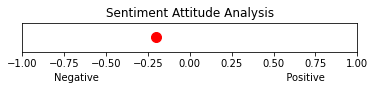

In [ ]:
 
document = types.Document(
    content=text_content,
    type=enums.Document.Type.PLAIN_TEXT)

sentiment = client.analyze_sentiment(document=document).document_sentiment
sscore = round(sentiment.score,4)
smag = round(sentiment.magnitude,4)

if sscore < 1 and sscore < -0.5:
  sent_label = "Very Negative"
elif sscore < 0 and sscore > -0.5:
  sent_label = "Negative"
elif sscore == 0:
  sent_label = "Neutral"
elif sscore > 0.5:
  sent_label = "Very Positive"
elif sscore > 0 and sscore < 0.5:
  sent_label = "Positive"

print('Sentiment Score: {} is {}'.format(sscore,sent_label))

predictedY =[sscore] 
UnlabelledY=[0,1,0]

if sscore < 0:
    plotcolor = 'red'
else:
    plotcolor = 'green'

plt.scatter(predictedY, np.zeros_like(predictedY),color=plotcolor,s=100)

plt.yticks([])
plt.subplots_adjust(top=0.9,bottom=0.8)
plt.xlim(-1,1)
plt.xlabel('Negative                                                            Positive')
plt.title("Sentiment Attitude Analysis")
plt.show()

Sentiment Magnitude: 0.6 is No Emotion


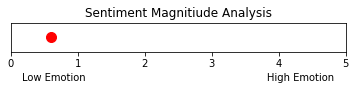

In [ ]:
#@title Calculate the perceived amount of emotion in a text.
if smag > 0 and smag < 1:
  sent_m_label = "No Emotion"
elif smag > 2:
  sent_m_label = "High Emotion"
elif smag > 1 and smag < 2:
  sent_m_label = "Low Emotion"

print('Sentiment Magnitude: {} is {}'.format(smag,sent_m_label))

predictedY =[smag] 
UnlabelledY=[0,1,0]

if smag > 0 and smag < 2:
    plotcolor = 'red'
else:
    plotcolor = 'green'

plt.scatter(predictedY, np.zeros_like(predictedY),color=plotcolor,s=100)

plt.yticks([])
plt.subplots_adjust(top=0.9,bottom=0.8)
plt.xlim(0,5)
plt.xlabel('Low Emotion                                                          High Emotion')
plt.title("Sentiment Magnitiude Analysis")
plt.show()


In [ ]:
#@title Calculate Categorization
response = client.classify_text(document)

for category in response.categories:
    print(u"Category name: {}".format(category.name))
    print(u"Confidence: {}%".format(int(round(category.confidence,3)*100)))

Category name: /Adult
Confidence: 87%


⏬ 
The NLP will process the text it’s given and try to place it into any number of preset categories where there is a high enough confidence.



#How Does Semantic Search Impact SEO?

1. Focus Shifts from Keywords to Topics: stop creating content around keywords and jump the gun on broad topics in your niche that you can cover in-depth.

2. Make a list of keywords and separate them by user intent.
For example, the queries **[iPhones vs. Android battery life]** or **[compare Apple and Samsung phones]** both fall under the  intent umbrella of **[compare smartphones]**

